In [1]:
#import os
import IGIMF4
import numpy as np
import pandas as pd

plots = IGIMF4.Plots()

Logistic function:

$f(x)=\frac{x_{\rm max}}{1+e^{-k(x-x_0)}}$

It is suitable to model population growths where there is some form of self-regulation.
- $x_0$ is the x-axis midpoint.
- $x_{\rm max}$ is the curve's maximum value.
- $k$ is the growth rate.

My choice for parameters:
- The variable $x$ is the metal mass fraction $Z$.
- $x_0 = Z_{\odot}$ (we center around solar values)
- $x_{\rm max} = 2 * 1.3$ (the alpha1 slope is 1.3 for solar values)
- $k = 2/Z_{\odot}$ this just happens to be a fair fit of the linear equation for alpha_1(Z) from Yan+21



In [2]:
# Parameters evaluated at time t

#metal_mass_fraction = 1e-1 * 0.0142
M_igal = 1e10

In [3]:
downsizing_obj = IGIMF4.Downsizing(M_igal)
print(f'{downsizing_obj.M_igal = :.2e} [Msun]')
print(f'{downsizing_obj.downsizing_time = } [Gyr]')
print(f'{downsizing_obj.SFR = } [Msun/yr]')

downsizing_obj.M_igal = 1.00e+10 [Msun]
downsizing_obj.downsizing_time = 0.9689945113416355 [Gyr]
downsizing_obj.SFR = 10.319975895585161 [Msun/yr]


In [4]:
# Grids

#mstar_v = np.logspace(-2,np.log10(3.6e3),num=50)
mstar_v = np.logspace(np.log10(0.07),np.log10(150), num=50)
print(f'{mstar_v=}')
print(f'{np.where(mstar_v<0.08)=}')
print(f'{np.where(mstar_v>150)=}\n')

Mecl_v = np.logspace(np.log10(5),10,num=50)
print(f'{Mecl_v=}')
print(f'{np.where(Mecl_v<5)=}')
print(f'{np.where(Mecl_v>5e9)=}\n')

Z_massfrac_v = np.logspace(-9,-1,num=50)
print(f'{Z_massfrac_v=}')
print(f'{np.where(Z_massfrac_v<1e-5)=}')
print(f'{np.where(Z_massfrac_v>0.0142)=}\n')

metallicity_v = np.log10(Z_massfrac_v/0.0142)
print(f'{metallicity_v=}')

mstar_v=array([7.00000000e-02, 8.18610844e-02, 9.57319592e-02, 1.11953171e-01,
       1.30922972e-01, 1.53107092e-01, 1.79050179e-01, 2.09389169e-01,
       2.44868921e-01, 2.86360506e-01, 3.34882594e-01, 3.91626461e-01,
       4.57985240e-01, 5.35588120e-01, 6.26340347e-01, 7.32470000e-01,
       8.56582693e-01, 1.00172554e+00, 1.17146199e+00, 1.36995927e+00,
       1.60209074e+00, 1.87355550e+00, 2.19101836e+00, 2.56227341e+00,
       2.99643542e+00, 3.50416362e+00, 4.09792334e+00, 4.79229212e+00,
       5.60431757e+00, 6.55393591e+00, 7.66446144e+00, 8.96315893e+00,
       1.04819130e+01, 1.22580109e+01, 1.43350581e+01, 1.67640486e+01,
       1.96046171e+01, 2.29265031e+01, 2.68112629e+01, 3.13542722e+01,
       3.66670675e+01, 4.28800844e+01, 5.01458601e+01, 5.86427784e+01,
       6.85794491e+01, 8.01998295e+01, 9.37892145e+01, 1.09681240e+02,
       1.28266075e+02, 1.50000000e+02])
np.where(mstar_v<0.08)=(array([0]),)
np.where(mstar_v>150)=(array([49]),)

Mecl_v=array([5.00000000e

In [5]:
IMF_v_Z_list = []
alpha1_Z_list = []
alpha3_Z_list = []
m_max_Z_list = []
k_IMF_Z_list = []
for Z in Z_massfrac_v:
    IMF_v_list = []
    alpha1_list = []
    alpha3_list = []
    m_max_list = []
    k_IMF_list = []
    for M in Mecl_v:
        igimf4 = IGIMF4.IGIMF(Z, downsizing_obj.SFR)
        sIMF = igimf4.stellar_IMF(M)
        print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF[4], sIMF[5], sIMF[6], sIMF[1], igimf4.metallicity))
        IMF_v = sIMF[2](mstar_v)
        alpha1_list.append(sIMF[4])
        alpha3_list.append(sIMF[6])
        m_max_list.append(sIMF[1])
        k_IMF_list.append(sIMF[0])
        IMF_v_list.append(IMF_v)
        #igimf4.ECMF_plot(Mecl_v, ECMF_v)
    IMF_v_Z_list.append(IMF_v_list)
    alpha1_Z_list.append(alpha1_list)
    alpha3_Z_list.append(alpha3_list)
    m_max_Z_list.append(m_max_list)
    k_IMF_Z_list.append(k_IMF_list)
    

M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -7.15
M=7.74e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 2.53e+00,	 [Z] = -7.15
M=1.20e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 3.27e+00,	 [Z] = -7.15
M=1.86e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 4.27e+00,	 [Z] = -7.15
M=2.87e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 5.62e+00,	 [Z] = -7.15
M=4.45e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 7.44e+00,	 [Z] = -7.15
M=6.88e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 9.88e+00,	 [Z] = -7.15
M=1.07e+02,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.32e+01,	 [Z] = -7.15
M=1.65e+02,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.26,	 m_max = 1.88e+01,	 [Z] = -7.15
M=2.55e+02,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.21,	 m_max = 2.73e+01,	 [Z] = -7.15
M=3.95e+02,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.16,	 m_max = 3.94e+01,	 [Z] = -7.15
M=6.12e+02,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.12,	

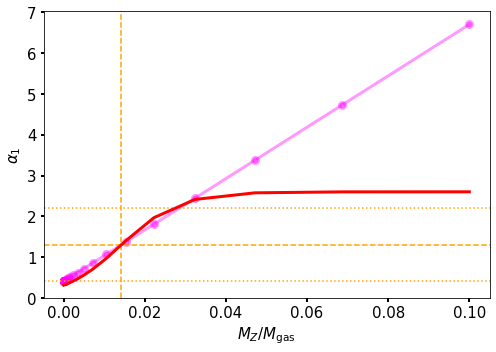

In [6]:
def alpha1_Z_plot(Z_massfrac_v, alpha1_Z_list):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    def alternative_alpha1_arctan(Z_massfrac_v):
        return 1.3 + np.arctan(1.3e2*(Z_massfrac_v - 0.0142))/1.3
    def alternative_alpha1(Z, maximum, Z_midpoint, growth_rate):
        return np.divide(maximum, 1 + np.exp(-np.multiply(growth_rate,Z-Z_midpoint)))
    Msun = r'$M_{\odot}$'
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    #ax.plot(np.log10(Z_massfrac_v)-0.0142, [alpha1_Z_list[i][0] for i in range(len(SFR_v))], linewidth=3, color='magenta')
    #ax.scatter(np.log10(Z_massfrac_v)-0.0142, [alpha1_Z_list[i][0] for i in range(len(SFR_v))], linewidth=3, color='magenta')
    ax.plot(Z_massfrac_v, [alpha1_Z_list[i][0] for i in range(len(Z_massfrac_v))], linewidth=3, color='magenta', alpha=0.4)
    ax.scatter(Z_massfrac_v, [alpha1_Z_list[i][0] for i in range(len(Z_massfrac_v))], linewidth=3, color='magenta', alpha=0.4)
    ax.set_ylabel(r'$\alpha_1$', fontsize=15)
    ax.set_xlabel(r'$M_Z/M_{\rm gas}$', fontsize=15)
    ax.axhline(1.3 - 63*0.0142, linestyle=':', color='orange')
    ax.axhline(1.3 + 63*0.0142, linestyle=':', color='orange')
    ax.axhline(1.3, linestyle='--', color='orange')
    ax.axvline(0.0142, linestyle='--', color='orange')
    #ax.plot(Z_massfrac_v - 0.0142, alternative_alpha1_arctan(Z_massfrac_v), color='red', linewidth=3)
    ax.plot(Z_massfrac_v, alternative_alpha1(Z_massfrac_v, 1.3*2, 0.0142, 2/0.0142), color='red', linewidth=3)
    #plt.title(r'SFR = %.2e [%s/yr]' %(self.SFR, Msun), fontsize=15)
    #ax.set_ylim(5e-2,1e8)
    #ax.set_xlim(1e-11,1e0)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    ax.tick_params(width=2)
    fig.tight_layout()
    #plt.savefig(f'Z_plot_{name}.pdf', bbox_inches='tight')
    plt.show(block=False)
alpha1_Z_plot(Z_massfrac_v, alpha1_Z_list)